# BANK MARKETING

In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Project Description
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


# Import Dataset

In [2]:
train_df=pd.read_csv("termdeposit_train.csv")
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
test_df=pd.read_csv("termdeposit_test.csv")
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
train_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
28477,7743,27,blue-collar,married,secondary,no,1341,yes,yes,unknown,30,may,254,2,-1,0,unknown,no
3503,27935,37,housemaid,single,primary,no,0,no,no,cellular,28,jan,399,1,-1,0,unknown,no
30859,40170,55,management,divorced,tertiary,no,9756,yes,no,cellular,5,jun,103,2,95,1,other,yes
11314,14071,43,technician,married,secondary,no,-260,yes,no,cellular,11,jul,183,2,-1,0,unknown,no
25534,30756,59,retired,divorced,tertiary,no,3444,no,no,cellular,6,feb,241,2,-1,0,unknown,yes


In [7]:
test_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2893,36630,24,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,212,1,-1,0,unknown
12228,12414,27,services,married,secondary,no,511,yes,no,unknown,30,jun,85,5,-1,0,unknown
12263,41000,35,admin.,single,tertiary,no,5007,yes,no,cellular,13,aug,73,1,112,2,other
10424,33484,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure
10658,38610,32,blue-collar,married,primary,no,233,yes,no,cellular,15,may,391,2,-1,0,unknown


In [8]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [9]:
test_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


# Exploratory Data Analysis

In [10]:
train_df.shape

(31647, 18)

In [11]:
test_df.shape

(13564, 17)

In [12]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [16]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [17]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

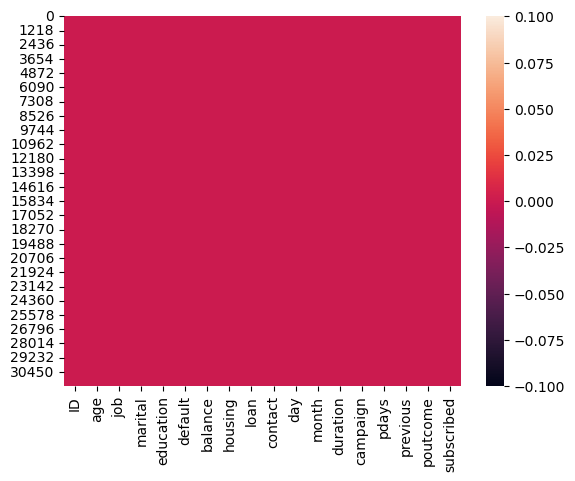

In [18]:
sns.heatmap(train_df.isnull())

<Axes: >

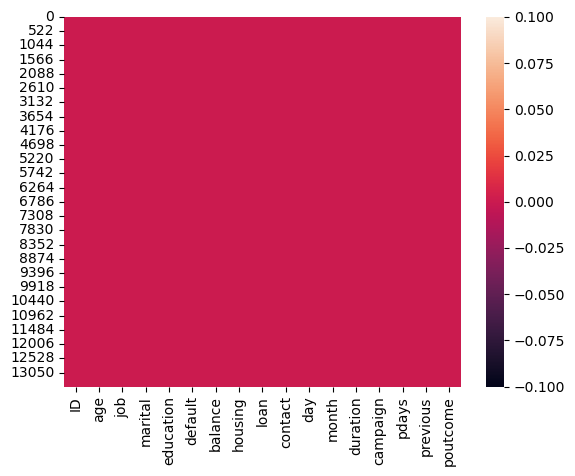

In [19]:
sns.heatmap(test_df.isnull())

In [20]:
# Check value count and  countplot
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

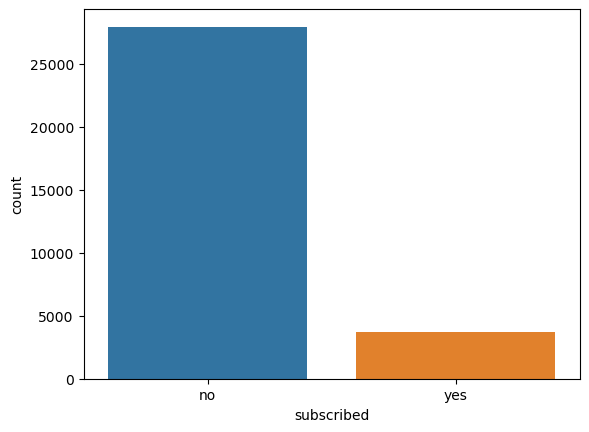

In [21]:
sns.countplot(data=train_df,x='subscribed')

In [22]:
train_df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='count'>

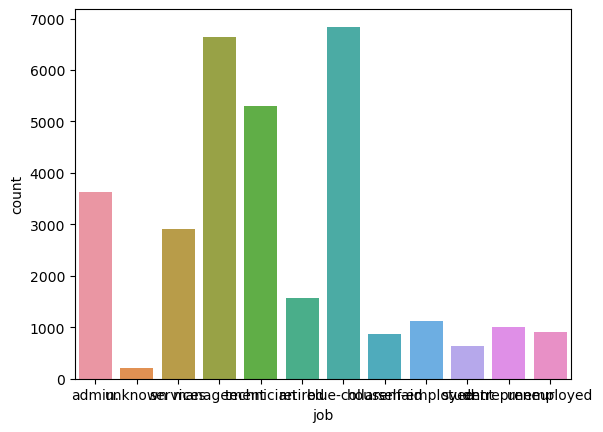

In [23]:
sns.countplot(data=train_df,x='job')

In [24]:
train_df['age'].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

<Axes: xlabel='age', ylabel='count'>

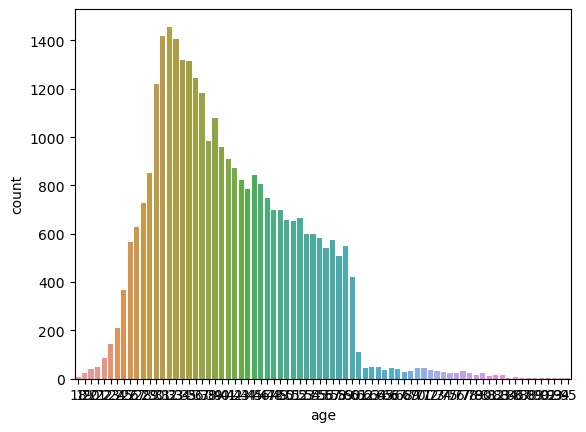

In [25]:
sns.countplot(data=train_df,x='age')

In [26]:
train_df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

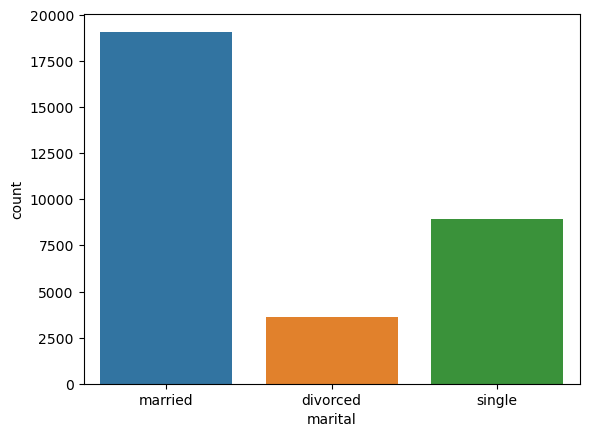

In [27]:
sns.countplot(data=train_df,x='marital')

In [28]:
train_df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

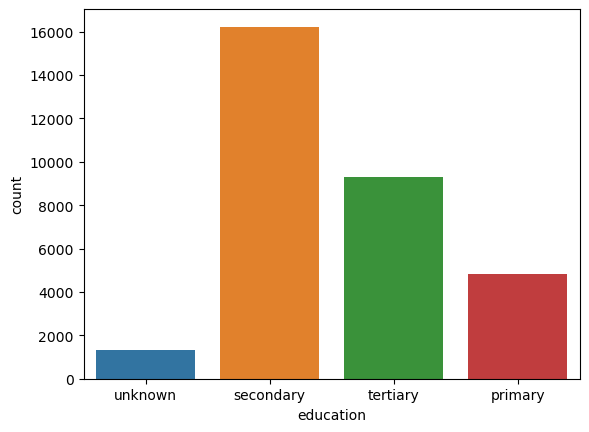

In [29]:
sns.countplot(data=train_df,x='education')

In [31]:
train_df['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

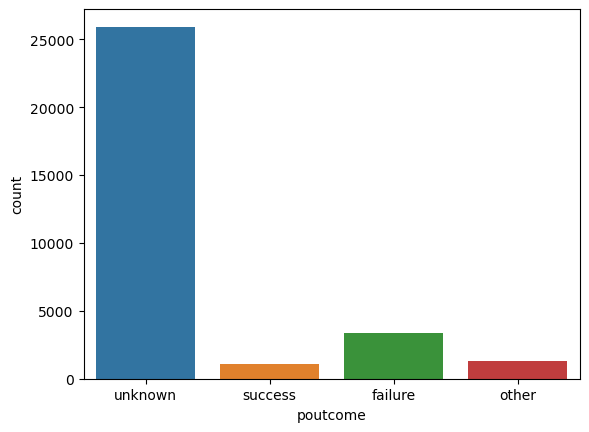

In [32]:
sns.countplot(data=train_df,x='poutcome')

<Axes: xlabel='marital', ylabel='count'>

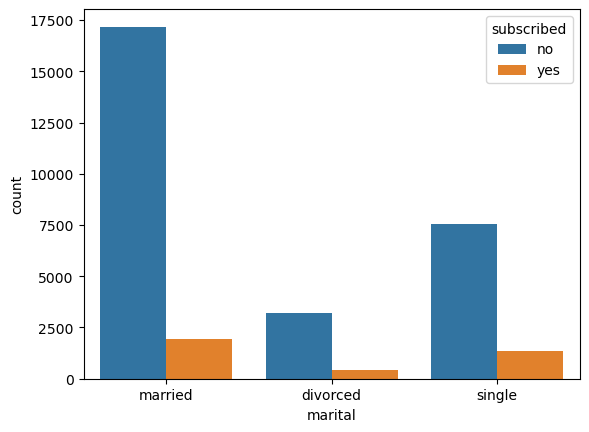

In [33]:
# To check between marital and subscribed
sns.countplot(data=train_df,x='marital',hue='subscribed')

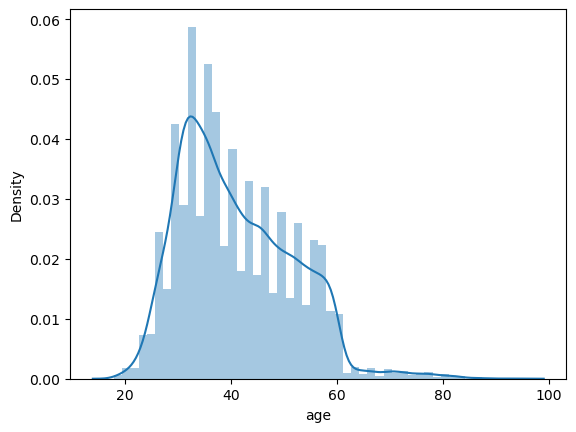

In [35]:
sns.distplot(train_df['age']);

In [36]:
# changing the value from subscribed into number
train_df['subscribed'].replace('no',0,inplace=True)
train_df['subscribed'].replace('yes',1,inplace=True)

In [37]:
train_df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

ID               Axes(0.125,0.53;0.110714x0.35)
age           Axes(0.257857,0.53;0.110714x0.35)
balance       Axes(0.390714,0.53;0.110714x0.35)
day           Axes(0.523571,0.53;0.110714x0.35)
duration      Axes(0.656429,0.53;0.110714x0.35)
campaign      Axes(0.789286,0.53;0.110714x0.35)
pdays            Axes(0.125,0.11;0.110714x0.35)
previous      Axes(0.257857,0.11;0.110714x0.35)
subscribed    Axes(0.390714,0.11;0.110714x0.35)
dtype: object

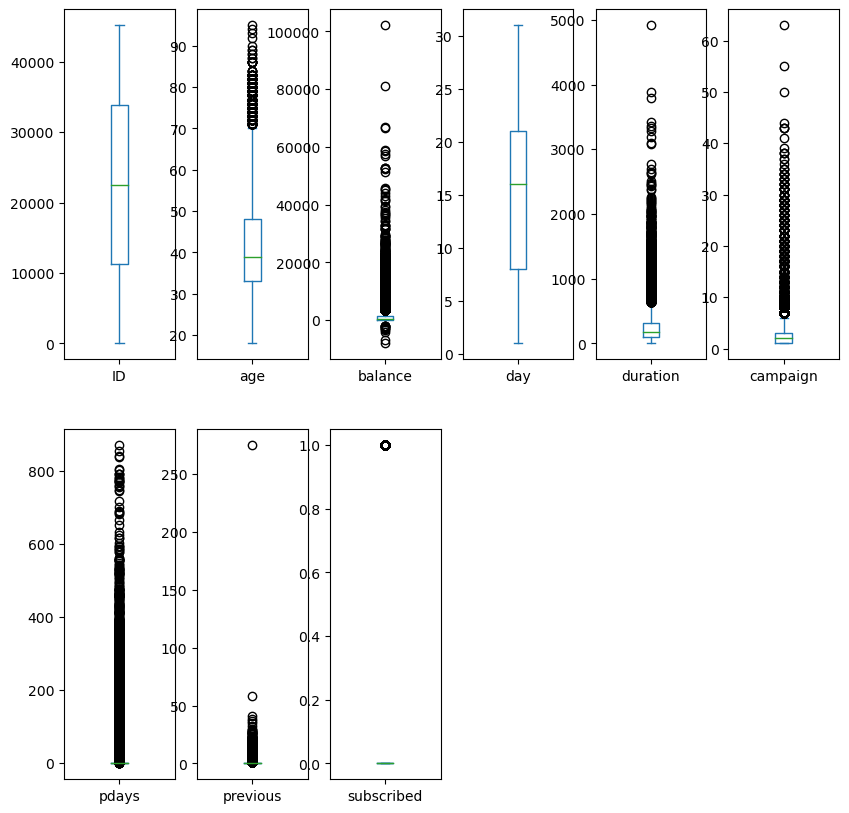

In [68]:
# Boxplot
train_df.plot(kind='box',subplots=True ,layout=(2,6) ,figsize=(10,10))

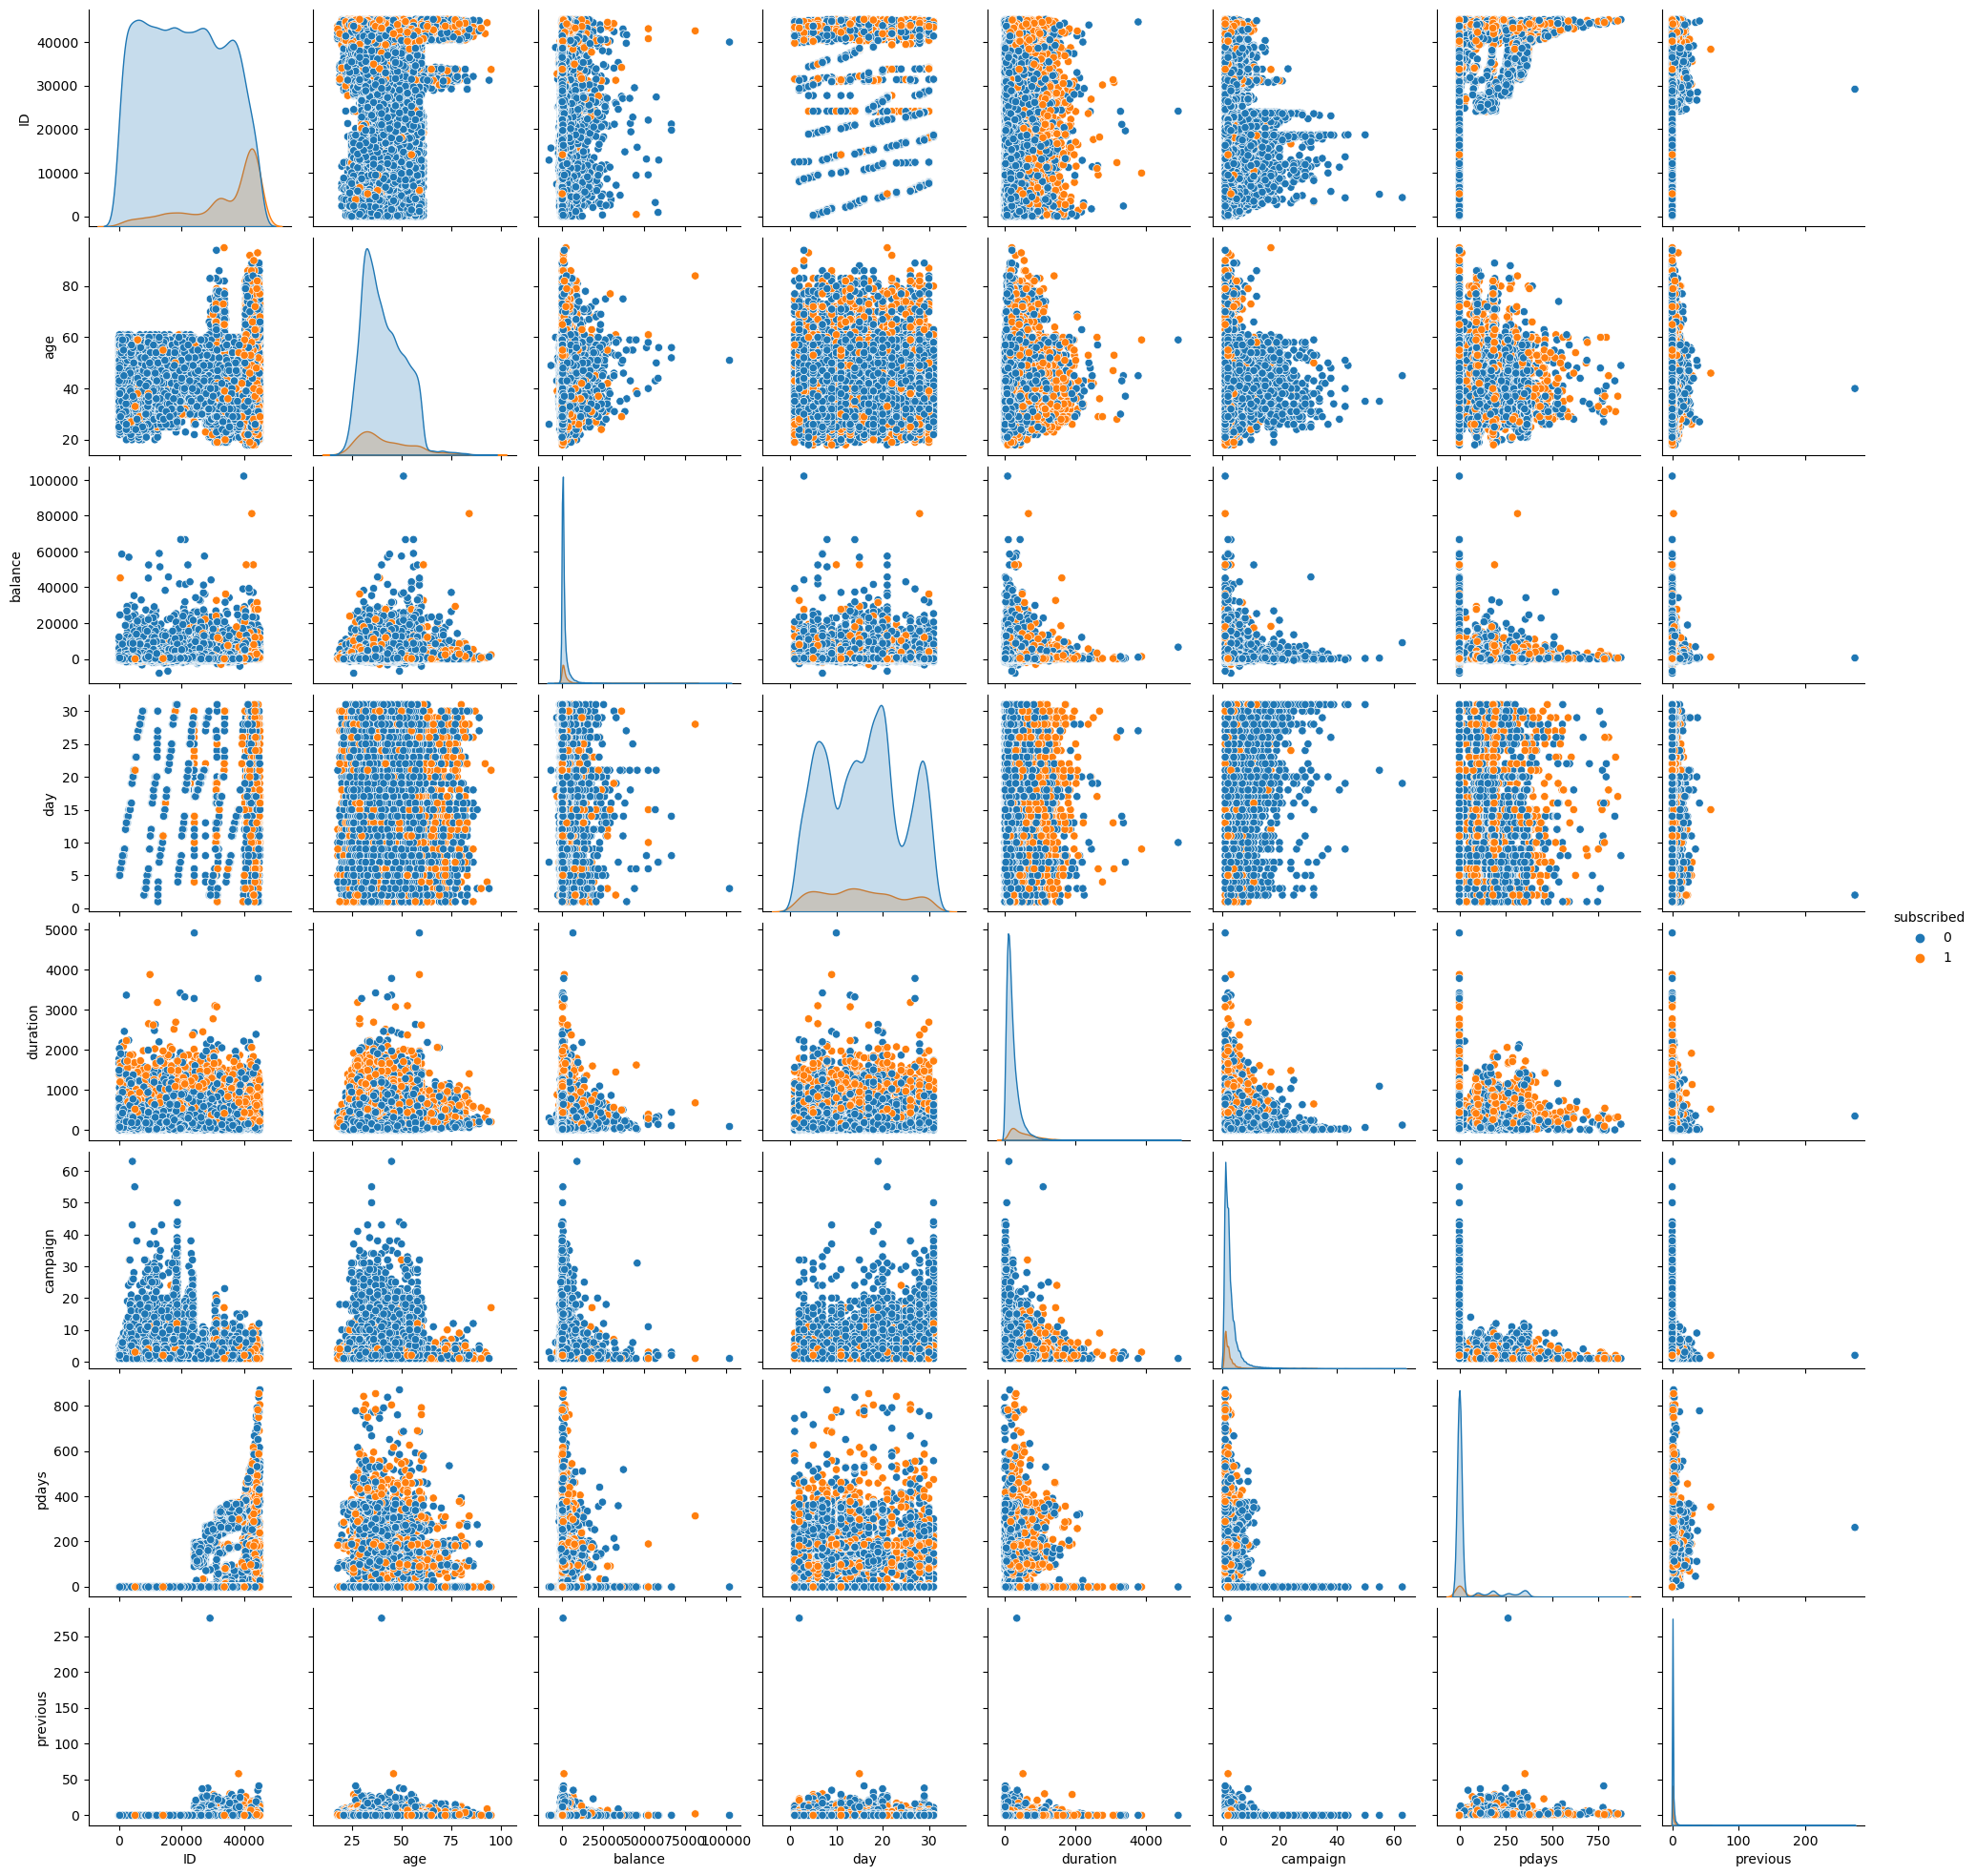

In [69]:
# PairPlot
sns.pairplot(train_df,hue='subscribed')

<Axes: >

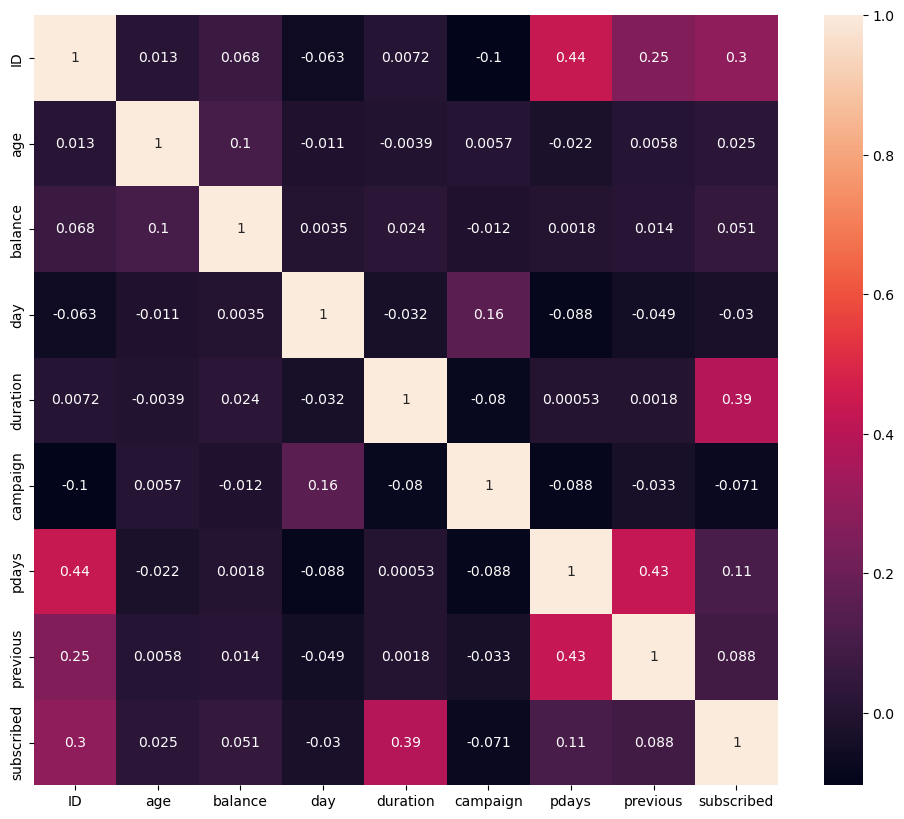

In [40]:
# Correlation
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(),annot=True)

# Machine Learning Implement

In [41]:
# Seperated into X ad Y Train Data
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

In [42]:
x=pd.get_dummies(x)
x.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22152, 52)
(22152,)
(9495, 52)
(9495,)


# Using Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lrpred=lr.predict(x_test)
lrpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
accuracy_score(y_test,lrpred)

0.8856240126382307

In [49]:
confusion_matrix(y_test,lrpred)

array([[8123,  262],
       [ 824,  286]], dtype=int64)

In [50]:
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8385
           1       0.52      0.26      0.34      1110

    accuracy                           0.89      9495
   macro avg       0.71      0.61      0.64      9495
weighted avg       0.86      0.89      0.87      9495



Acurracy using Logistic Regression is 88.56

# Using Decision Tree Classifier

In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
accuracy_score(y_test,dtcpred)

0.881621906266456

In [54]:
confusion_matrix(y_test,dtcpred)

array([[7811,  574],
       [ 550,  560]], dtype=int64)

In [55]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8385
           1       0.49      0.50      0.50      1110

    accuracy                           0.88      9495
   macro avg       0.71      0.72      0.72      9495
weighted avg       0.88      0.88      0.88      9495



Acurracy using Decision Tree Classifier is 88.16

# Using Random Forest Classifier

In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
rfcpred=rfc.predict(x_test)
rfcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_test,rfcpred)

0.9104791995787257

In [59]:
confusion_matrix(y_test,rfcpred)

array([[8121,  264],
       [ 586,  524]], dtype=int64)

In [60]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8385
           1       0.66      0.47      0.55      1110

    accuracy                           0.91      9495
   macro avg       0.80      0.72      0.75      9495
weighted avg       0.90      0.91      0.90      9495



Acurracy using Random Forest Classifier is 91.04

# Test Phase

In [61]:
test=pd.get_dummies(test_df)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [62]:
# Predict Test 
test_pred=dtc.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [64]:
# Predict Train 
train_pred=dtc.predict(x_test)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# Repalce y test into yes $ no
y_test.replace(0,'no',inplace=True)
y_test.replace(1,'yes',inplace=True)
y_test

1923     no
20759    no
4413     no
10495    no
25014    no
         ..
18478    no
17210    no
24921    no
30950    no
26942    no
Name: subscribed, Length: 9495, dtype: object

# Saving Model

In [70]:
import joblib
joblib.dump(lr,'Bank_Marketing.obj')

['Bank_Marketing.obj']